**Import Necessary Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

**Load Dataset**

In [ ]:
data = pd.read_excel("cust_data.xlsx")

In [ ]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
data.shape

(30000, 38)

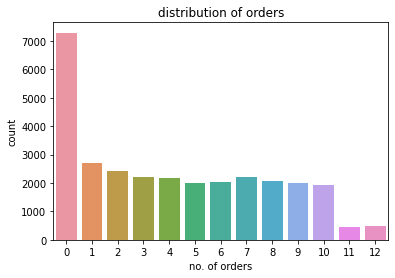

In [ ]:
#Distribution of order placed by customers
sns.countplot(data=data,x='Orders')
plt.title('distribution of orders')
plt.xlabel('no. of orders')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'count')

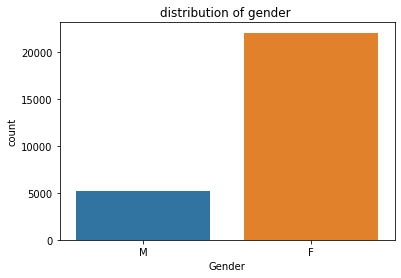

In [ ]:
#Distribution of the gender of the customers

sns.countplot(data=data,x='Gender')
plt.title('distribution of gender ')
plt.xlabel('Gender')
plt.ylabel('count')

**Statistical Summary**

In [ ]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


The average number of orders placed by customers is 4

**Data Visualization** 

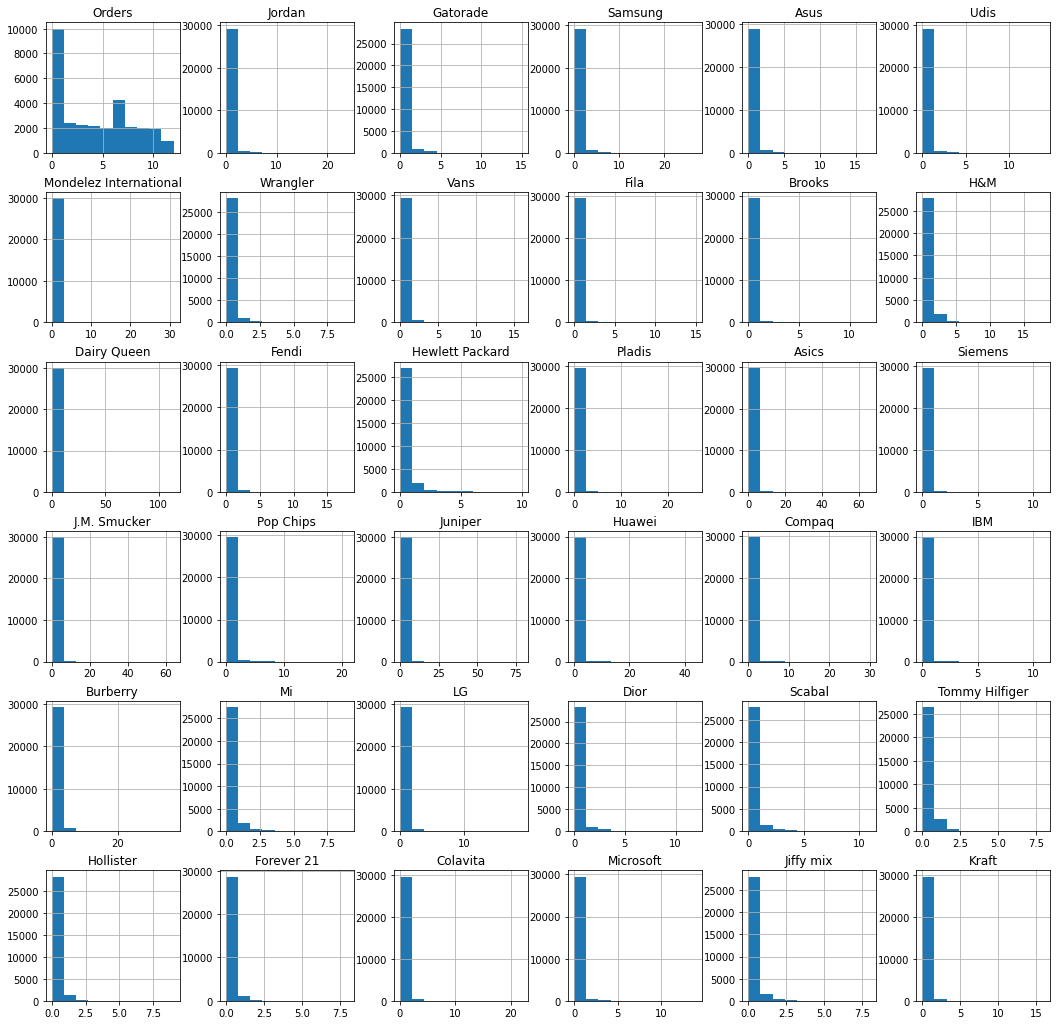

In [ ]:
data.iloc[:,1:].hist(figsize=(18,18))
plt.show()

**Data preprocessing**

In [ ]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
#Missing value present only in Gender

In [ ]:
#drop the missing values
data = data.dropna()
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
data['Gender'].isnull().sum()

0

In [ ]:
data.shape

(27276, 38)

In [ ]:
label = LabelEncoder()
label.fit(data['Gender'])
data['Gender'] = label.transform(data['Gender'])

In [ ]:
data=data.drop(['Orders','Gender'],axis=1)
data.head()

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


**KMeans**

**Silhouette Score**

In [ ]:
score = []
cluster = []
for index in range(2,10):
    km = KMeans(n_clusters = index)
    label = km.fit_predict(data)
    score.append(silhouette_score(data,label))
    cluster.append(index)
    print('for index: ',str(index),'coeff: ',silhouette_score(data,label))

for index:  2 coeff:  0.6262947550669
for index:  3 coeff:  0.5900548415553766
for index:  4 coeff:  0.5722393535716226
for index:  5 coeff:  0.5608806401592381
for index:  6 coeff:  0.5538425743517765
for index:  7 coeff:  0.5483731048967327
for index:  8 coeff:  0.5451038583983542
for index:  9 coeff:  0.5410182024575262


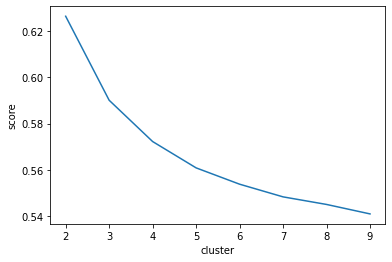

In [ ]:
plt.plot(cluster,score)
plt.xlabel('cluster')
plt.ylabel('score')
plt.show()

**Elbow Method**

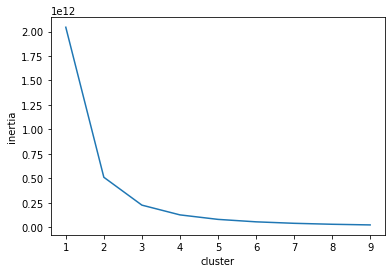

In [ ]:
inertias = []
clusters = []
for index in range(1,10):
    km = KMeans(n_clusters=index)
    km.fit(data)
    inertias.append(km.inertia_)
    clusters.append(index)
plt.plot(clusters,inertias)
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.show()

Here the elbow occurs at value 3, so we consider 3 as K value

In [ ]:
# building k means model for k =3
km = KMeans(n_clusters=3)
km.fit(data)

KMeans(n_clusters=3)

**cluster
customers with similar interest**

In [ ]:
data_output=data.copy(deep=True)
data_output['cluster']=km.labels_
data_output.head()

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,2
1,2,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,6,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2


In [ ]:
# check the size of each cluster
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([9105, 9095, 9076]))

In [ ]:
#Find the centres
center=pd.DataFrame(km.cluster_centers_,columns=data_output.columns[1:37])
center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,15028.861285,0.261285,0.268863,0.217463,0.175288,0.142449,0.156178,0.112356,0.102471,0.117628,...,0.089621,0.272597,0.380780,0.154311,0.066227,0.050961,0.191323,0.119385,0.097529,0.068753
1,25006.788022,0.344725,0.276374,0.294725,0.207802,0.197033,0.157143,0.127912,0.128242,0.084835,...,0.126044,0.327363,0.414505,0.171978,0.116593,0.077473,0.196044,0.120769,0.077802,0.084835
2,5011.483188,0.224452,0.243082,0.170103,0.122148,0.102855,0.112997,0.085878,0.112116,0.080476,...,0.092382,0.218499,0.334913,0.154118,0.050491,0.043435,0.193915,0.121817,0.096461,0.060192


In [ ]:
# sort the variables
cluster_1=sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10]
cluster_1_var=pd.DataFrame(cluster_1)[1]
cluster_1_var

0            Jordan
1         Pop Chips
2            Huawei
3                Mi
4    Tommy Hilfiger
5       Dairy Queen
6           Siemens
7            Scabal
8           Samsung
9          Gatorade
Name: 1, dtype: object

In [ ]:
cluster_2=sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10]
cluster_2_var=pd.DataFrame(cluster_2)[1]
cluster_2_var

0            Jordan
1         Pop Chips
2                Mi
3            Huawei
4    Tommy Hilfiger
5       Dairy Queen
6          Gatorade
7            Scabal
8           Siemens
9           Juniper
Name: 1, dtype: object

In [ ]:
cluster_3=sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10]
cluster_3_var=pd.DataFrame(cluster_3)[1]
cluster_3_var

0            Jordan
1         Pop Chips
2            Huawei
3                Mi
4    Tommy Hilfiger
5       Dairy Queen
6           Siemens
7            Compaq
8           Samsung
9             Fendi
Name: 1, dtype: object

**Conclusion**

In this case study , we have grouped the customers dataset into 3 clusters based on the brands they have searched on e-commerece sites. we have used the elbow method to find the optimum number of clusters and decided k=3 as the best pick after analysing the silhouette score .

After applying the K-means algorithms with an 3 number of clusters , we segmented the customers with similar interest. These clusters give the information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers.